# Ejemplo de convet para clasificación de perros y gatos

El dataset esta disponible en: www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import os, shutil

In [2]:
os.getcwd()

'/tf/deep_learning_keras'

In [3]:
path = '/tf/deep_learning_keras/data/cats_and_dogs/'

## Data cats

In [5]:
# train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'train_dir/train_cats_dir', fname)
    shutil.copyfile(src, dst)

In [6]:
# validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'validation_dir/validation_cats_dir', fname)
    shutil.copyfile(src, dst)

In [7]:
# test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'test_dir/test_cats_dir', fname)
    shutil.copyfile(src, dst)

## Data dogs

In [8]:
# train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'train_dir/train_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [9]:
# validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'validation_dir/validation_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [10]:
# test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'test_dir/test_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [12]:
# Revion cantidades
print('total training cat images: ', len(os.listdir(path + 'train_dir/train_cats_dir')))
print('total training dog images: ', len(os.listdir(path + 'train_dir/train_dogs_dir')))

print('total validation cat images: ', len(os.listdir(path + 'validation_dir/validation_cats_dir')))
print('total validation dog images: ', len(os.listdir(path + 'validation_dir/validation_dogs_dir')))

print('total test cat images: ', len(os.listdir(path + 'test_dir/test_cats_dir')))
print('total test cat images: ', len(os.listdir(path + 'test_dir/test_cats_dir')))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test cat images:  500


## Creacion de instancia de una convets

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(521, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [15]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [16]:
# Utilizar ImageDataGenerator para leer imagenes del directorio
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    path + 'train_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [18]:
# Produce:
# lotes de imagenes RGB de 150 x 150 con forma: (20, 150 150, 3)
# etiquetas binarias con forma: (20,)
validation_generator = test_datagen.flow_from_directory(
    path + 'validation_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
) 

Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('data batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
data batch shape:  (20,)


In [20]:
# Ajuste del modelo utilizando un generador por lotes
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 12s 125ms/step - loss: 0.7031 - accuracy: 0.5615 - val_loss: 0.6294 - val_accuracy: 0.5660
Epoch 2/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6217 - accuracy: 0.6630 - val_loss: 0.8863 - val_accuracy: 0.5170
Epoch 3/30
100/100 [==============================] - 5s 47ms/step - loss: 0.5567 - accuracy: 0.7210 - val_loss: 0.6206 - val_accuracy: 0.7010
Epoch 4/30
100/100 [==============================] - 5s 47ms/step - loss: 0.5070 - accuracy: 0.7535 - val_loss: 0.5246 - val_accuracy: 0.7020
Epoch 5/30
100/100 [==============================] - 5s 48ms/step - loss: 0.4704 - accuracy: 0.7810 - val_loss: 0.7629 - val_accuracy: 0.6940
Epoch 6/30
100/100 [==============================] - 5s 47ms/step - loss: 0.4194 - accuracy: 0.8090 - val_loss: 1.0438 - val_accuracy: 0.6180
Epoch 7/30
100/100 [==============================] - 5s 47ms/step - loss: 0.3871 - accuracy: 0.8275 - val_loss: 0.9320 - val_accuracy: 0.71

In [21]:
# Guardar el modelo
model.save('models/cats_and_dogs_small_1.keras')

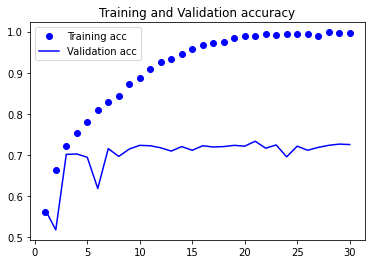

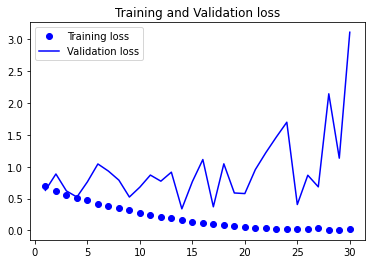

In [22]:
# Plot de curvas de perdida y exactitud durante el entrenamiento
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()